# PORTFOLIO OPTIMO (MARKOWITZ)


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import time
import datetime as dt

start = '2016-01-01'
end =   '2022-01-31'



In [3]:
tic = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [4]:
tic

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
497,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
498,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
500,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [5]:
tickers = list(tic.Symbol)

In [6]:

#tickers = ['AAPL','BAC','CSCO','DIS','EDN','F','GGAL','HPE','SPY']
#tickers = ['EDN','GGAL','PAMP.BA','GRIM.BA']
#tickers = ['AAPL','BAC','CSCO','DIS']
#tickers = ['AAPL','MSFT','SPY','GLD']
#tickers = ['X' , 'KO' , 'GGAL' , 'GLD' , 'BABA']

#start = '2017-01-03'
#end = '2020-01-03'
data = yf.download(tickers,start,end)['Volume']
#data = yf.download(tickers,start)
#data = data['Adj Close'].dropna()



[*********************100%***********************]  502 of 502 completed

4 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- KVUE: Data doesn't exist for startDate = 1451624400, endDate = 1643605200
- GEHC: Data doesn't exist for startDate = 1451624400, endDate = 1643605200


In [7]:
data

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,3287300,12037200,270597600,10308400,12227500,1220700,2817000,2993800,2648900,4040800,...,4249800,2819300,20400100,1387100,1353400,4821623,2104084,656200,3523300,2871700
2016-01-05,2587200,10514200,223164000,7179600,8245200,1497600,2409000,1821300,2689500,3863200,...,4286100,2141200,11993500,1611200,1075400,5273420,2294737,611300,2653600,3116700
2016-01-06,2103600,12393800,273829600,8952700,5906000,2013000,3134200,1674000,3779700,6072600,...,3316100,5191900,18826900,1179700,1866000,5049330,2751233,881900,4164200,4670500
2016-01-07,3504300,11312900,324377600,9292600,7151400,1418100,3194700,2717800,5163000,4820500,...,5525600,5212200,21263800,1140400,1555400,11005453,1829589,1210600,4234000,4324400
2016-01-08,3736700,8853100,283192000,7985200,7477700,1323300,2330200,2263400,3805200,4130700,...,5740000,3005400,19033600,1233700,1471500,5996184,1670969,1034700,3401600,4946100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2155300,59941000,162294600,13733800,10864500,2056600,4544500,7538000,6665200,4235400,...,5484500,4502300,41507000,1739500,1501200,2927300,2113045,853600,2327900,4093400
2022-01-25,1705300,42471600,115798400,10296500,9126600,1703900,3625400,4051500,4064200,4188200,...,3114200,4756500,39278400,1785600,1636300,2667400,2417410,537900,3832600,2673200
2022-01-26,1999500,39331800,108275300,8040300,14753100,1647800,4422200,4449500,5850000,6153400,...,3153000,4062100,35252400,1560900,1233300,1958600,2914591,592500,2315800,4532700


In [8]:
volumen = pd.DataFrame(data.mean())

In [9]:
volumen

,0
A,2.025938e+06
AAL,2.284485e+07
AAPL,1.261785e+08
ABBV,7.544011e+06
ABT,6.549001e+06
...,...
YUM,2.381567e+06
ZBH,1.383447e+06
ZBRA,4.398750e+05
ZION,2.381731e+06


In [10]:
vol_ord = volumen.sort_values(by=0 , ascending=False)

In [11]:
vol_ord

,0
AAPL,1.261785e+08
TSLA,1.228821e+08
AMZN,8.480635e+07
BAC,7.086385e+07
AMD,6.017905e+07
...,...
NVR,2.712248e+04
BF.B,NaN
BRK.B,NaN
GEHC,NaN


In [12]:
vol_5 = vol_ord[:5]

In [13]:
vol_5

,0
AAPL,1.261785e+08
TSLA,1.228821e+08
AMZN,8.480635e+07
BAC,7.086385e+07
AMD,6.017905e+07


In [14]:
vol_5.index

Index(['AAPL', 'TSLA', 'AMZN', 'BAC', 'AMD'], dtype='object')

In [15]:
tic_5 = list(vol_5.index)

In [16]:
tic_5

['AAPL', 'TSLA', 'AMZN', 'BAC', 'AMD']

In [17]:
tickers = tic_5

In [18]:
data = yf.download(tickers,start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [19]:
data.head()

,AAPL,AMD,AMZN,BAC,TSLA
Date,,,,,
2016-01-04,24.009062,2.77,31.849501,13.956213,14.894000
2016-01-05,23.407415,2.75,31.689501,13.956213,14.895333
2016-01-06,22.949333,2.51,31.632500,13.658914,14.602667
2016-01-07,21.980774,2.28,30.396999,13.166240,14.376667
2016-01-08,22.096996,2.14,30.352501,12.911409,14.066667


In [20]:
log_returns = np.log(data/data.shift()).dropna()

In [21]:
log_returns

,AAPL,AMD,AMZN,BAC,TSLA
Date,,,,,
2016-01-05,-0.025378,-0.007246,-0.005036,0.000000,0.000090
2016-01-06,-0.019764,-0.091318,-0.001800,-0.021532,-0.019844
2016-01-07,-0.043121,-0.096107,-0.039841,-0.036736,-0.015598
2016-01-08,0.005274,-0.063370,-0.001465,-0.019545,-0.021799
2016-01-11,0.016063,0.089345,0.017456,0.007211,-0.015041
...,...,...,...,...,...
2022-01-24,-0.004876,-0.019377,0.013239,-0.008271,-0.014836
2022-01-25,-0.011450,-0.047448,-0.032042,0.019561,-0.012552
2022-01-26,-0.000564,-0.003787,-0.007986,0.010292,0.020488


# Elementos básicos

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AMD'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'BAC'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

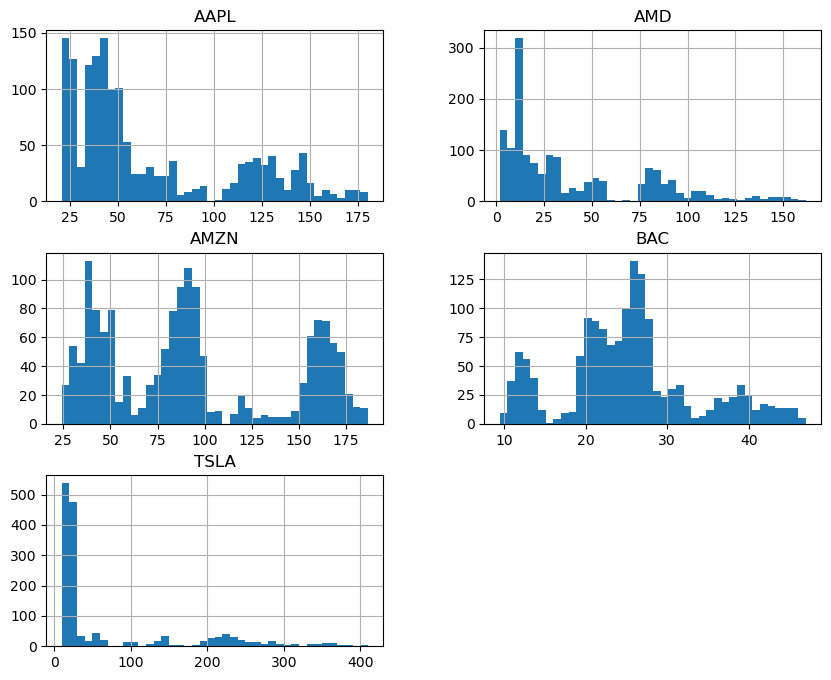

In [22]:
data.hist(bins=40,figsize=(10,8))

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AMD'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'BAC'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

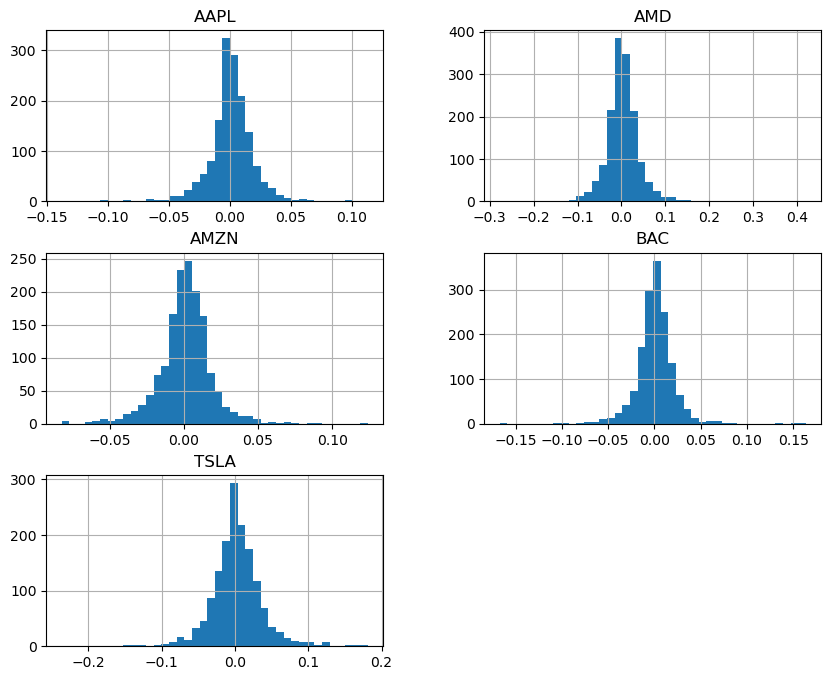

In [23]:
log_returns.hist(bins=40, figsize=(10,8))

### matriz de covarianza anualizada


In [24]:
log_returns.cov()*252

,AAPL,AMD,AMZN,BAC,TSLA
AAPL,0.086805,0.074678,0.052026,0.041414,0.068475
AMD,0.074678,0.366034,0.071206,0.056097,0.110880
AMZN,0.052026,0.071206,0.086491,0.026635,0.062008
BAC,0.041414,0.056097,0.026635,0.111689,0.047467
TSLA,0.068475,0.110880,0.062008,0.047467,0.330830


### retornos medios anuales

In [25]:
log_returns.mean()*252

AAPL    0.321265
AMD     0.599492
AMZN    0.248644
BAC     0.188573
TSLA    0.484777
dtype: float64

## Modelo teórico basico

In [26]:
noa = len(tickers)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.27220623, 0.19207944, 0.15043341, 0.02999488, 0.35528604])

In [27]:
weights.sum()

0.9999999999999999

### Retorno esperado del portfolio

In [28]:
np.sum(log_returns.mean()*weights) *252

0.41789540589616375

### Volatilidad del portfolio

In [29]:
# b = np.dot(log_returns.cov()*252,weights)


In [30]:
# a = np.dot(weights.T, b)


In [31]:
var_portfolio = np.dot(weights.T, np.dot(log_returns.cov()*252,weights))
var_portfolio

0.11752044803539875

In [32]:
std_portfolio=var_portfolio**0.5
std_portfolio

0.3428125552476145

In [33]:
def port_ret(weights):
    return np.sum(log_returns.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

In [34]:
%%time
prets = []
pvols = []
for p in range (1000):
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

Wall time: 765 ms


Text(0, 0.5, 'retorno esperado')

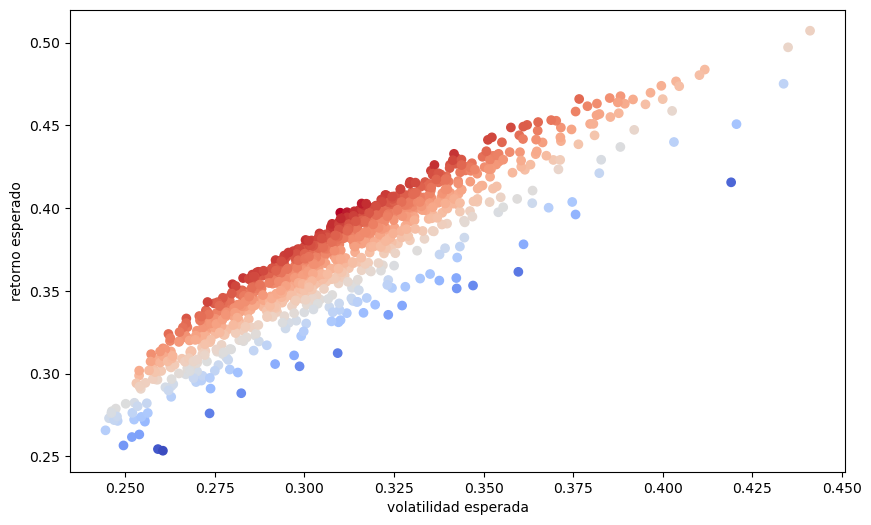

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c = prets / pvols , cmap='coolwarm')
plt.xlabel('volatilidad esperada')
plt.ylabel('retorno esperado')


# Optimización del portfolio

In [36]:
import scipy.optimize as sco

In [37]:
# función a minimizar
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [38]:
# restricción de igualdad
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
        {'type': "ineq", 'fun': lambda x: sum([-i if i < 0.05 else 0 for i in x])}
       )  

In [39]:
# limite de los parámetros
bnds = tuple((0, 1) for x in range(noa))  

In [40]:
# vector de pondereaciones iguales
eweights = np.array(noa * [1. / noa,])  


In [41]:
min_func_sharpe(eweights)

-1.2413616602121138

In [42]:
eweights

array([0.2, 0.2, 0.2, 0.2, 0.2])

## Resolviendo mediente derivación matematica el problema de minimización


### Cartera de máximo Sharpe Ratio 

In [43]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

Wall time: 101 ms


In [44]:
opts

     fun: -1.286764417357142
     jac: array([-1.66445971e-05,  3.16500664e-05, -1.35600567e-06, -1.97704434e-02,
        1.20103359e-05])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.37252354e-01, 2.27626794e-01, 7.98891682e-02, 6.95244643e-18,
       1.55231684e-01])

In [45]:
# ponderación del portfolio óptimo de max sharpe
opts['x'].round(3) 

array([0.537, 0.228, 0.08 , 0.   , 0.155])

In [46]:
# retorno del portfolio optimo de max sharpe
port_ret(opts['x']).round(3) 

0.404

In [47]:
# volatilidad del portfolio optimo de max sharpe
port_vol(opts['x']).round(3)  

0.314

In [48]:
# Ratio de sharpe máximo
port_ret(opts['x']) / port_vol(opts['x'])

1.286764417357142

In [49]:
portfolio_maxs = pd.Series(np.dot(log_returns , opts['x']),index=log_returns.index)
portfolio_maxs

Date
2016-01-05   -0.015673
2016-01-06   -0.034629
2016-01-07   -0.050647
2016-01-08   -0.015092
2016-01-11    0.028027
                ...   
2022-01-24   -0.008276
2022-01-25   -0.021460
2022-01-26    0.001378
2022-01-27   -0.037521
2022-01-28    0.047663
Length: 1529, dtype: float64

### Cartera de minima varianza

In [50]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [51]:
optv.x.round(3)

array([0.269, 0.   , 0.41 , 0.321, 0.   ])

In [52]:
pond_mv=optv['x']
cartera_mv = dict(zip(tickers,pond_mv))
ret_mv = port_ret(optv['x'])
vol_mv = port_vol(optv['x'])
sharpe_mv = ret_mv / vol_mv

In [53]:
print('Cartera de Mínima Varianza:')
print('-'*len('Cartera de Mínima Varianza:'))

for k,v in cartera_mv.items():
    print(k,v.round(3))

print('Retorno: ',ret_mv.round(3))
print('Volatilidad: ',vol_mv.round(3))
print('Ratio de Sharpe: ',sharpe_mv.round(3))
    

Cartera de Mínima Varianza:
---------------------------
AAPL 0.269
TSLA 0.0
AMZN 0.41
BAC 0.321
AMD 0.0
Retorno:  0.249
Volatilidad:  0.241
Ratio de Sharpe:  1.034


In [54]:
portfolio_minv = pd.Series(np.dot(log_returns , optv['x']),index=log_returns.index)

## Resolviendo con mañas y sin matemática

In [55]:
import random


In [56]:
%%time
p_pond= []
p_ret = []
p_vol = []

for p in range (10000):  
    pond = np.random.random(noa)  
    pond /= np.sum(pond)
    p_pond.append(pond)
    p_ret.append(port_ret(pond))
    p_vol.append(port_vol(pond))
    
prets = np.array(p_ret)
pvols = np.array(p_vol)

Wall time: 7.43 s


In [57]:
result = list(zip(p_pond,p_ret,p_vol))

In [58]:
result = pd.DataFrame(result)

In [59]:
result.columns=['ponderaciones','ret_log','volatilidad']

In [60]:
result['sharpe']=result.ret_log / result.volatilidad
result.head(9)

,ponderaciones,ret_log,volatilidad,sharpe
0,"[0.09029934038818688, 0.3329022847613796, 0.30...",0.430881,0.354213,1.216445
1,"[0.23870133501042123, 0.13427806022315886, 0.3...",0.341340,0.276921,1.232625
2,"[0.2237263766822794, 0.30972059374506855, 0.01...",0.427075,0.347668,1.228398
3,"[0.30508771444278854, 0.15988269649425213, 0.0...",0.381784,0.314758,1.212945
4,"[0.19349237962016805, 0.15866839264037177, 0.2...",0.372595,0.303701,1.226849
5,"[0.23700456942486697, 0.02103685364307939, 0.2...",0.317844,0.279802,1.135959
6,"[0.28100418581667985, 0.1406391225091675, 0.26...",0.321178,0.263279,1.219914
7,"[0.14899335055924268, 0.09413285662265308, 0.0...",0.365295,0.325943,1.120731
8,"[0.2059167825253057, 0.2219745049416795, 0.188...",0.383245,0.307461,1.246484


In [61]:
result.volatilidad.min()

0.2412854778199424

In [62]:
result.volatilidad.idxmin()

8499

In [63]:
result.sharpe.max()

1.2865627452909163

In [64]:
result.sharpe.idxmax()

3930

In [65]:
result.loc[result.sharpe.idxmax()]


ponderaciones    [0.5082578389729161, 0.21535365663466421, 0.10...
ret_log                                                   0.394381
volatilidad                                               0.306539
sharpe                                                    1.286563
Name: 3930, dtype: object

In [66]:
print('Cartera de Máximo Sharpe:')
print('-'*len('Cartera de Máximo Sharpe:'))

print('Activos en cartera: ', tickers)
print('Proporción activos en cartera: ', result.ponderaciones[result.sharpe.idxmax()].round(4))
print('Retorno: ', result.ret_log[result.sharpe.idxmax()])
print('Volatilidad: ',result.volatilidad[result.sharpe.idxmax()])
print('Ratio de Sharpe: ',result.sharpe[result.sharpe.idxmax()])




Cartera de Máximo Sharpe:
-------------------------
Activos en cartera:  ['AAPL', 'TSLA', 'AMZN', 'BAC', 'AMD']
Proporción activos en cartera:  [0.5083 0.2154 0.1077 0.0221 0.1465]
Retorno:  0.39438146062580587
Volatilidad:  0.3065388470708661
Ratio de Sharpe:  1.2865627452909163


In [67]:
op_vol=result.loc[result.sharpe.idxmax(),'volatilidad']
op_ret=result.loc[result.sharpe.idxmax(),'ret_log']

Text(0.3065388470708661, 0.39438146062580587, 'Optimo')

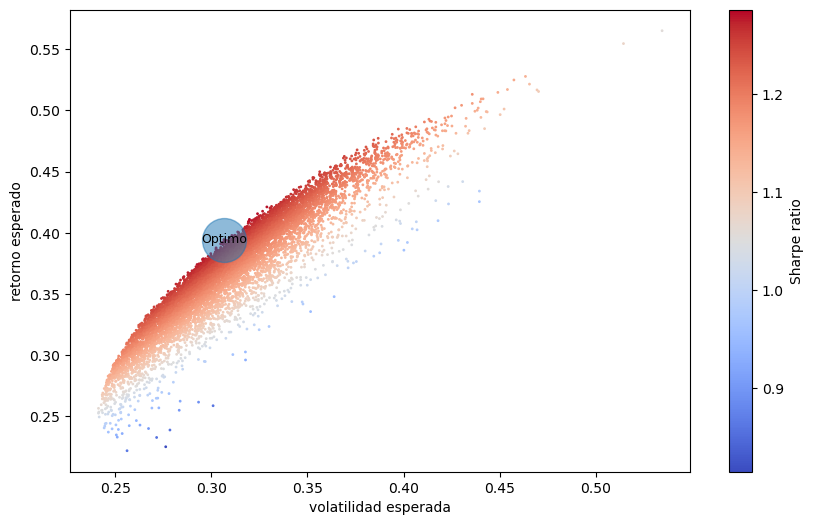

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(result.volatilidad, result.ret_log, c=result.sharpe , s=1, cmap='coolwarm')
plt.xlabel('volatilidad esperada')
plt.ylabel('retorno esperado')
plt.colorbar(label='Sharpe ratio')

plt.scatter(op_vol, op_ret, c='tab:blue', alpha=0.5, s=1000) 
plt.text(op_vol, op_ret, 'Optimo', fontsize=9, c='k', ha='center', va='center') 
